In [94]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sp
import scipy.optimize as op
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVC
import nltk
from nltk.stem.porter import *
import re
from nltk.corpus import stopwords

In [2]:
path="H:/assignments/machine_learning/mex6/machine-learning-ex6/ex6/ex6data1.mat"
data=sp.loadmat(path)
X=data['X']
y=data['y']

### Visualizing the data

In [3]:
def plotData(X,y):
    X1_pos=X[:,0][y[:,0]==1]
    X1_neg=X[:,0][y[:,0]==0]
    X2_pos=X[:,1][y[:,0]==1]
    X2_neg=X[:,1][y[:,0]==0]
    plt.scatter(X1_pos,X2_pos,c='red',marker='+')
    plt.scatter(X1_neg,X2_neg,c='b',marker='o')   
    return plt 

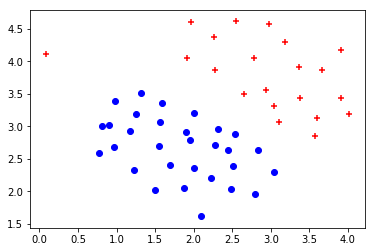

In [4]:
plotData(X,y).show()

In [6]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
#     print(X[:, 0].min(),X[:, 0].max(),X[:, 1].min(),X[:, 0].max())
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6,6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    plotData(X, y)
    #plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

### Training linear SVM

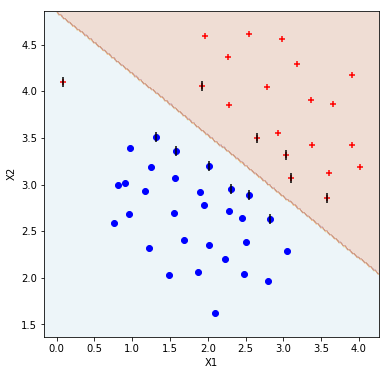

Number of support vectors:  12


In [7]:
# For C value 1
plt.close('all')
clf=SVC(C=1.0, kernel='linear')
clf.fit(X,y.ravel())
plot_svc(clf, X, y, h=0.02, pad=0.25)

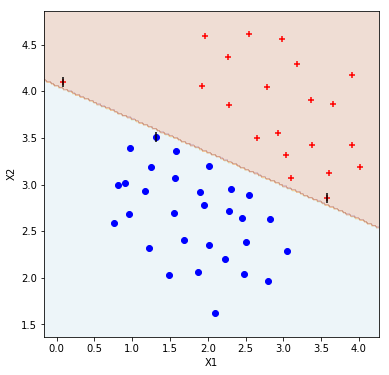

Number of support vectors:  3


In [8]:
# For C value 2
plt.close('all')
clf=SVC(C=100.0, kernel='linear')
clf.fit(X,y.ravel())
plot_svc(clf, X, y, h=0.02, pad=0.25)

 <h4>Implementing Gaussian Kernel</h4>

In [9]:
plt.close('all')
def gaussian_kernel(x1, x2, sigma):
    mag= (x1-x2).T.dot(x1-x2)
    return(np.exp(-mag/(2*sigma**2)))

In [10]:
x_t,y_t=np.c_[1,2,1].T,np.c_[0,4,1].T
gaussian_kernel(x_t,y_t,2)

array([[ 0.53526143]])

<h4>Loading dataset</h4>

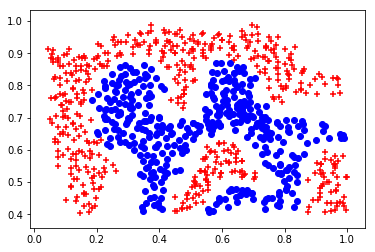

In [11]:
path="H:/assignments/machine_learning/mex6/machine-learning-ex6/ex6/ex6data2.mat"
data2=sp.loadmat(path)
X,y=data2['X'],data2['y']
plotData(X,y).show()

<h4>Training SVM with RBF Kernel</h4>

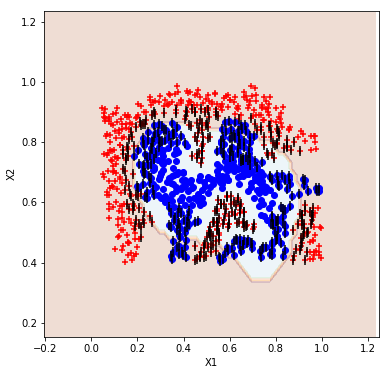

Number of support vectors:  456


In [12]:
plt.close('all')
sigma = 0.1
b= np.power(sigma,-2.)
clf=SVC(C=1.0,kernel='rbf',gamma=6)
clf.fit(X,y.ravel())
plot_svc(clf, X, y, h=0.02, pad=0.25)

<h4>Loading the dataset3</h4>

In [18]:
plt.close('all')
path="H:/assignments/machine_learning/mex6/machine-learning-ex6/ex6/ex6data3.mat"
data=sp.loadmat(path)
X=data['X']
y=data['y']

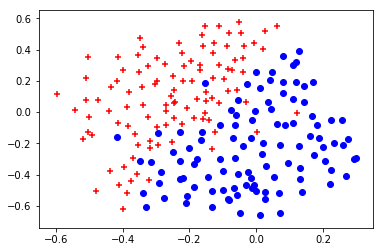

In [19]:
plotData(X,y).show()
plt.close('all')

In [20]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape,X_test.shape

((168, 2), (43, 2))

In [40]:
from sklearn.metrics import accuracy_score
list_param=[0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
li_acc=[]
li_par=[]
for i in list_param:
    for j in list_param:
            sigma = i
            b= np.power(sigma,-2.)
            clf=SVC(C=j,kernel='rbf',gamma=6)
            clf.fit(X,y.ravel())
            y_pred=clf.predict(X_val).reshape(y_val.shape)
            scr=accuracy_score(y_test, y_pred)
            li_par.append(str(i)+' '+str(j))
            li_acc.append(scr)

In [41]:
print("maximum score:",max(li_acc))
inde=li_acc.index(max(li_acc))
print("index of maximum score:",inde)
print('optmal C and sigma:',li_par[inde])

maximum score: 0.976744186047
index of maximum score: 6
optmal C and sigma: 0.01 10


<h4>Plotting  Decision boundary on optimal C and sigma</h4>

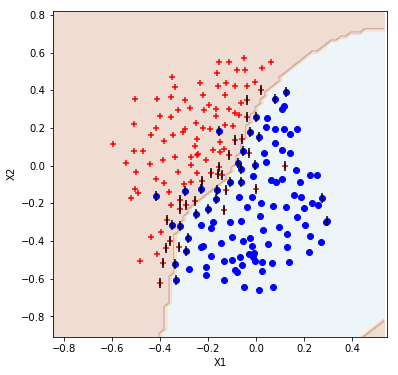

Number of support vectors:  53


In [43]:
sigma = 0.01
b= np.power(sigma,-2.)
clf=SVC(C=10.0,kernel='rbf',gamma=6)
clf.fit(X,y.ravel())
plot_svc(clf, X, y, h=0.02, pad=0.25)
plt.close('all')

## Spam classification

<h4>Email Preprocessing</h4>

In [188]:
path="H:/assignments/machine_learning/mex6/machine-learning-ex6/ex6/emailSample1.txt"
with open(path,'r') as file:
      txt=file.read().replace('\n','')
txt        

"> Anyone knows how much it costs to host a web portal ?>Well, it depends on how many visitors you're expecting.This can be anywhere from less than 10 bucks a month to a couple of $100. You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 if youre running something big..To unsubscribe yourself from this mailing list, send an email to:groupname-unsubscribe@egroups.com"

In [189]:
def preprocess(txt):
    txt=txt.lower()#lowercase
    # Strip all HTML
    # Looks for any expression that starts with < and ends with > and replace
    # and does not have any < or > in the tag it with a space
    pattern='<[^<>]+>'
    txt=re.sub(pattern," ",txt)
    #Any numbers get replaced with the string 'number'
    txt = re.sub('[0-9]+', 'number', txt)
    
    #Anything starting with http or https:// replaced with 'httpaddr'
    txt = re.sub('(http|https)://[^\s]*', 'httpaddr', txt)
    
    #Strings with "@" in the middle are considered emails --> 'emailaddr'
    txt = re.sub('[^\s]+@[^\s]+', 'emailaddr', txt)
    
    #The '$' sign gets replaced with 'dollar'
    txt = re.sub('[$]+', 'dollar', txt)
    
    #nltk tokenization ans stemming
    tokens=nltk.word_tokenize(txt)
    stemmer = PorterStemmer()
    txt_list=[stemmer.stem(token) for token in tokens]
    
    #removing non words
    filtered_sentence =  [w for w in txt_list if w.isalpha()]
    
    return filtered_sentence

In [190]:
path="H:/assignments/machine_learning/mex6/machine-learning-ex6/ex6/vocab.txt"
dict_v={}
with open(path,'r') as file:
     data=file.readlines()
for i in data:  
     li=i.replace('\n','').split('\t')
     dict_v[li[1]]=li[0]

In [191]:
#vocab Size
len(dict_v)

1899

In [209]:
def feature(txt_list):
    vect=np.zeros((1,len(dict_v)))                  
    for i in txt_list:
        if i in dict_v:
            vect[:,int(dict_v[i]),]=1
    return vect                 
                     

In [210]:
print(txt)
vect=feature(preprocess(txt))
print(vect)
np.count_nonzero(vect)

> Anyone knows how much it costs to host a web portal ?>Well, it depends on how many visitors you're expecting.This can be anywhere from less than 10 bucks a month to a couple of $100. You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 if youre running something big..To unsubscribe yourself from this mailing list, send an email to:groupname-unsubscribe@egroups.com
[[ 0.  0.  0. ...,  1.  0.  0.]]


42

## Training Spam Data 

In [212]:
path="H:/assignments/machine_learning/mex6/machine-learning-ex6/ex6/spamTrain.mat"
data=sp.loadmat(path)
X=data['X']
y=data['y']
X.shape,y.shape

((4000, 1899), (4000, 1))

In [214]:
clf=SVC(C=0.1, kernel='linear')
clf.fit(X,y.ravel())

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [217]:
y_pred=clf.predict(X).reshape(y.shape)
scr=accuracy_score(y, y_pred)*100
print("Training Accuracy",scr)
path="H:/assignments/machine_learning/mex6/machine-learning-ex6/ex6/spamTest.mat"
data=sp.loadmat(path)
X_test=data['Xtest']
y_test=data['ytest']
y_pred=clf.predict(X_test).reshape(y_test.shape)
scr=accuracy_score(y_test, y_pred)*100
print("Testing Accuracy",scr)

Training Accuracy 99.825
Testing Accuracy 98.9


In [237]:
# Determine the words most likely to indicate an e-mail is a spam
# From the trained SVM we can get a list of the weight coefficients for each
# word (technically, each word index)
vocab_dict_flipped = {int(v): k for k, v in dict_v.items()}
#Sort indicies from most important to least-important (high to low weight)
sorted_indices = np.argsort(clf.coef_, axis=None )[::-1]
print("The 15 most important words to classify a spam e-mail are:")
print([ vocab_dict_flipped[x] for x in sorted_indices[:15] ])
print()
print("The 15 least important words to classify a spam e-mail are:")
print([ vocab_dict_flipped[x] for x in sorted_indices[-15:] ])

# Most common word (mostly to debug):
pos=X[:,][y[:,0]==1]
neg=X[:,][y[:,0]==0]
most_common_word = vocab_dict_flipped[sorted_indices[0]]
print('# of spam containing \"%s\" = %d/%d = %0.2f%%'% \
    (most_common_word, sum(pos[:,1190]),pos.shape[0],  \
     100.*float(sum(pos[:,1190]))/pos.shape[0]))
print('# of NON spam containing \"%s\" = %d/%d = %0.2f%%'% \
    (most_common_word, sum(neg[:,1190]),neg.shape[0],      \
     100.*float(sum(neg[:,1190]))/neg.shape[0]))

The 15 most important words to classify a spam e-mail are:
['otherwis', 'clearli', 'remot', 'gt', 'visa', 'base', 'doesn', 'wife', 'previous', 'player', 'mortgag', 'natur', 'll', 'futur', 'hot']

The 15 least important words to classify a spam e-mail are:
['http', 'toll', 'xp', 'ratio', 'august', 'unsubscrib', 'useless', 'numberth', 'round', 'linux', 'datapow', 'wrong', 'urgent', 'that', 'spam']
# of spam containing "otherwis" = 804/1277 = 62.96%
# of NON spam containing "otherwis" = 301/2723 = 11.05%
